Project Title:
Uber Supply-Demand Gap Analysis

Project Type:
Exploratory Data Analysis (EDA) | Business Intelligence | Operations Analytics

Prepared by : Ajay Bramhankar

This end-to-end data analysis project investigates ride request patterns in Uber data to identify causes behind high cancellation rates and trip failures. The study leverages Python for data wrangling and EDA, SQL for data validation, and Excel for dashboard creation. The goal is to uncover insights into supply-demand mismatches across time slots and pickup locations, and recommend business actions to improve fulfillment rates.




GITHUB LINK :- 
https://github.com/ajayy077/FINAL_PROJECTS


C:\Users\ajayb\AppData\Local\Temp\ipykernel_17148\1520703260.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')


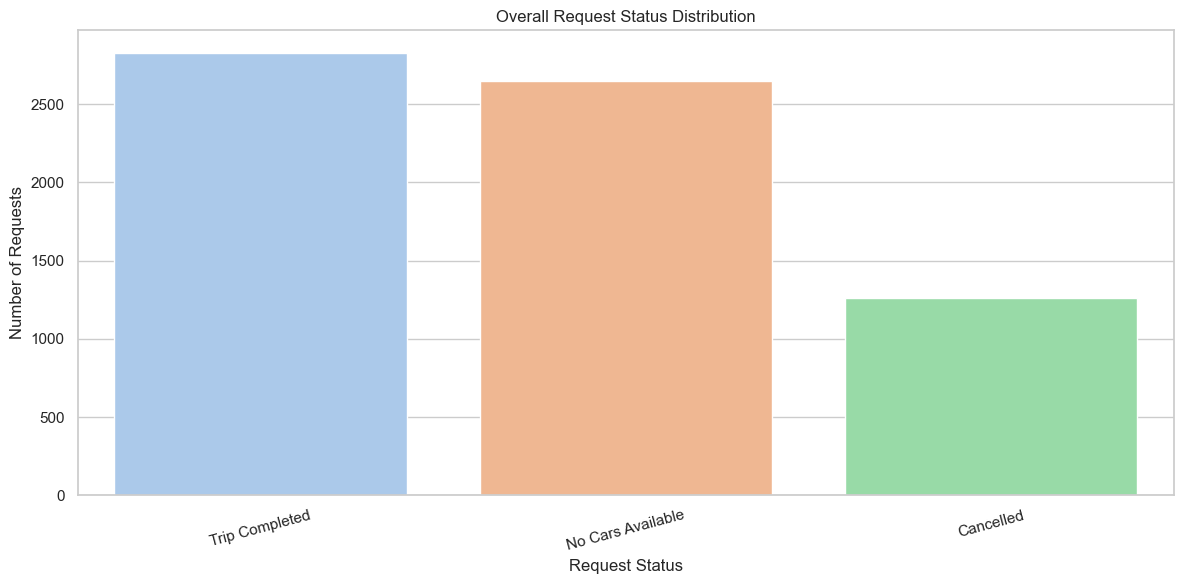

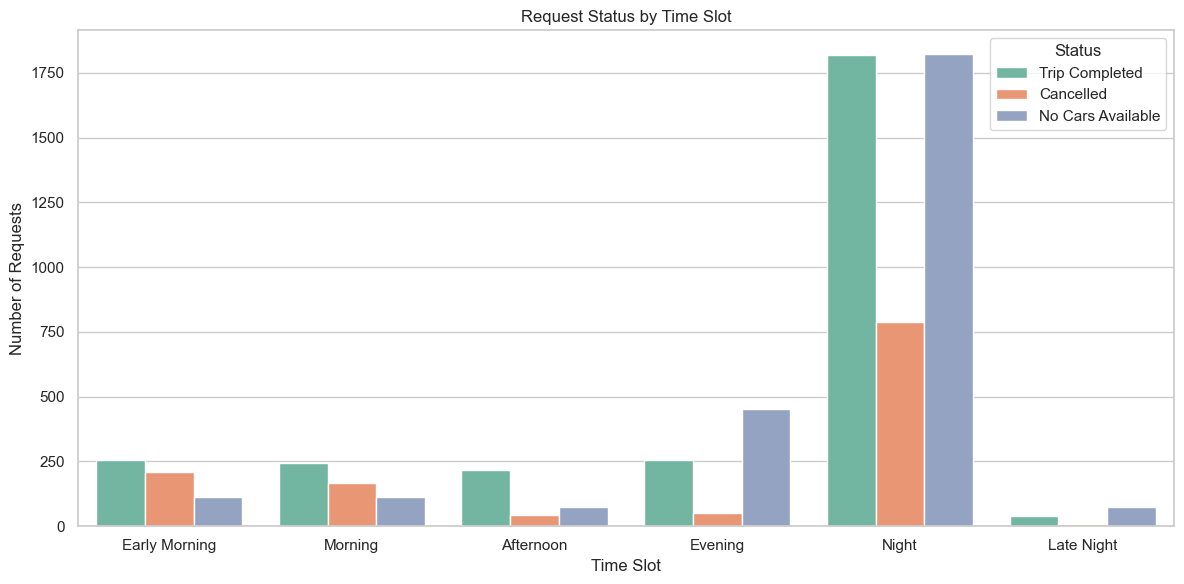

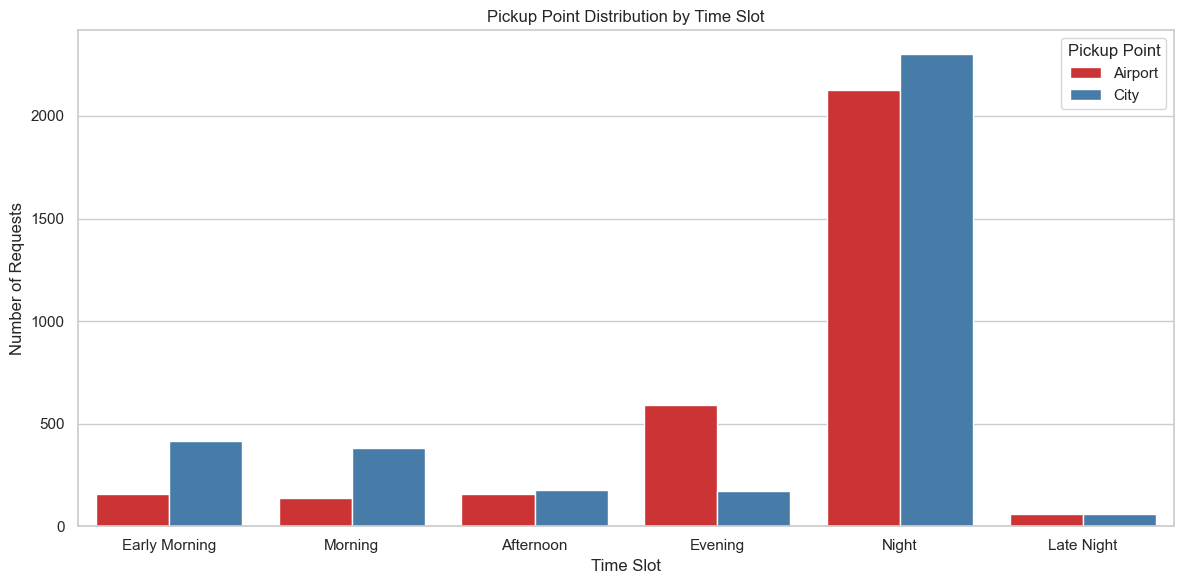

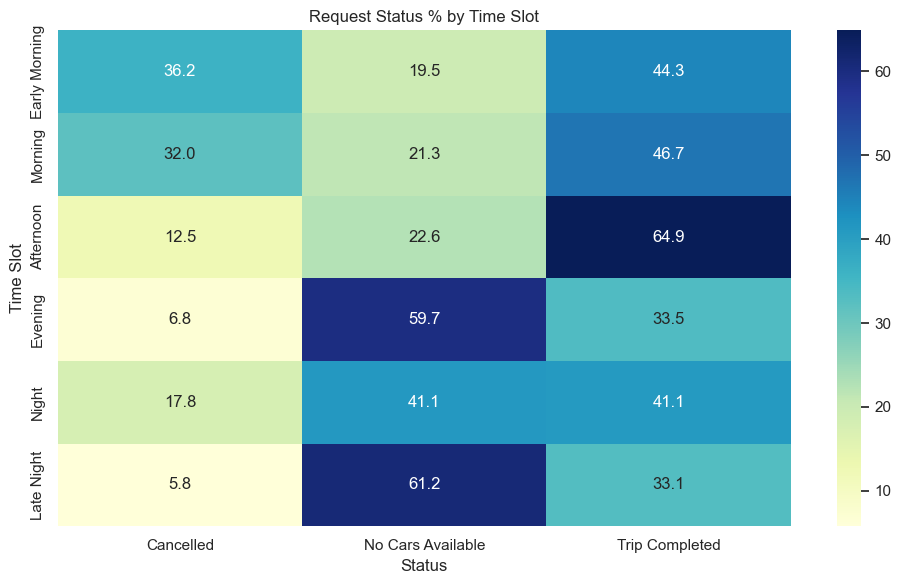

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset from your local path
df = pd.read_csv(r"C:\Users\ajayb\Downloads\Uber Request Data.csv")

# Convert timestamp columns to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Extract hour and day
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request day'] = df['Request timestamp'].dt.date

# Define time slot function
def get_time_slot(hour):
    if 0 <= hour < 4:
        return 'Late Night'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply time slot to each row
df['Time Slot'] = df['Request hour'].apply(get_time_slot)

# --------------------------
# 1. Overall Request Status
# --------------------------
status_counts = df['Status'].value_counts()
plt.figure()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')
plt.title('Overall Request Status Distribution')
plt.xlabel('Request Status')
plt.ylabel('Number of Requests')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --------------------------------
# 2. Request Status by Time Slot
# --------------------------------
plt.figure()
sns.countplot(data=df, x='Time Slot', hue='Status', palette='Set2', order=[
    'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'
])
plt.title('Request Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 3. Pickup Point vs Time Slot vs Request Status
# --------------------------------------------------
plt.figure()
sns.countplot(data=df, x='Time Slot', hue='Pickup point', palette='Set1', order=[
    'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'
])
plt.title('Pickup Point Distribution by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Pickup Point')
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Heatmap of Supply-Demand Gap
# -----------------------------
heatmap_data = pd.crosstab(index=df['Time Slot'], columns=df['Status'], normalize='index') * 100
heatmap_data = heatmap_data.loc[['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Request Status % by Time Slot')
plt.xlabel('Status')
plt.ylabel('Time Slot')
plt.tight_layout()
plt.show()
